In [1]:
import numpy as np
from qiskit import *
from qiskit.quantum_info.operators import Operator
import time
import tensornetwork as tn
import graphviz

In [2]:
def is_diagonal(U):
    i, j = np.nonzero(U)
    return np.all(i == j)

def add_hyper_index(var_list,hyper_index):
    for var in var_list:
        if not var in hyper_index:
            hyper_index[var]=0
            
def reshape(U):
    if U.shape==(2,2):
        return U
    
    if U.shape[0]==U.shape[1]:
        split_U=np.split(U,2,1)
    else:
        split_U=np.split(U,2,0)
    split_U[0]=reshape(split_U[0])
    split_U[1]=reshape(split_U[1]) 
    return np.array([split_U])[0]            
            
def get_real_qubit_num(cir):
    """Calculate the maximun number of qubits of a circuit"""
    gates=cir.data
    q=0
    for k in range(len(gates)):
        q=max(q,max([qbit.index for qbit in gates[k][1]]))
    return q+1

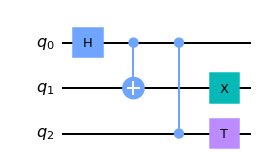

In [3]:
cir=QuantumCircuit(3)
cir.h(0)
cir.cx(0,1)
cir.cz(2,0)
cir.x(1)
cir.t(2)
cir.draw('mpl')

In [5]:
qubits_num=get_real_qubit_num(cir)
gates=cir.data
Node=[]
for k in range(len(gates)):
    g=gates[k] #kth qubit.
    nam=g[0].name  #gate name.
    q = [q.index for q in g[1]]  #Which qubit operate the gate.
    U = g[0].to_matrix() #get the gate matrix
    
    Node.append(tn.Node(U,nam))
Node

/tmp/ipykernel_13151/2967669766.py:27: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  q=max(q,max([qbit.index for qbit in gates[k][1]]))
/tmp/ipykernel_13151/1595193436.py:7: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  q = [q.index for q in g[1]]  #Which qubit operate the gate.


[Node
 (
 name : 'h',
 tensor : 
 array([[ 0.70710678+0.j,  0.70710678+0.j],
        [ 0.70710678+0.j, -0.70710678+0.j]]),
 edges : 
 [
 Edge(Dangling Edge)[0] 
 , 
 Edge(Dangling Edge)[1] 
 ] 
 ),
 Node
 (
 name : 'cx',
 tensor : 
 array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]]),
 edges : 
 [
 Edge(Dangling Edge)[0] 
 , 
 Edge(Dangling Edge)[1] 
 ] 
 ),
 Node
 (
 name : 'cz',
 tensor : 
 array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]]),
 edges : 
 [
 Edge(Dangling Edge)[0] 
 , 
 Edge(Dangling Edge)[1] 
 ] 
 ),
 Node
 (
 name : 'x',
 tensor : 
 array([[0.+0.j, 1.+0.j],
        [1.+0.j, 0.+0.j]]),
 edges : 
 [
 Edge(Dangling Edge)[0] 
 , 
 Edge(Dangling Edge)[1] 
 ] 
 ),
 Node
 (
 name : 't',
 tensor : 
 array([[1.        +0.j        , 